In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=[]
def draw(event,x,y,flag,param):
    if event == cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),10,(255,0,0),3)
    elif event == cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),10,(0,255,0),3)
        

In [3]:
img = np.zeros((255,255,3),np.uint8)
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("window name",draw)

while True:
    cv2.imshow("window name",img)
    if cv2.waitKey(1) & 255 == ord("q"):
        break
cv2.destroyAllWindows()

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(dataset)

In [6]:
# Save the data frame to a CSV file
# df.to_csv('my_data.csv', index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       138 non-null    int64
 1   1       138 non-null    int64
 2   2       138 non-null    int64
dtypes: int64(3)
memory usage: 3.4 KB


In [8]:
df.head()

,0,1,2
0,12,18,0
1,10,34,0
2,9,49,0
3,22,44,0
4,30,30,0


In [9]:
df[2].unique()

array([0, 1], dtype=int64)

### Observation: It comes under Binary Classification task

### Splitting the data as x and ys

In [12]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [13]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

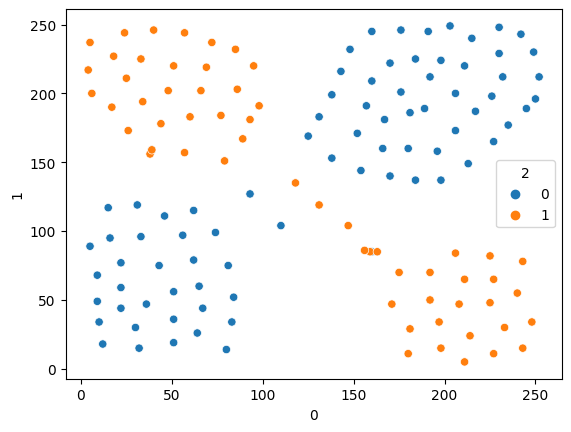

In [14]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

### Observation: By seeing the above graph we can easily say that it is non linearly separable poins.
### Hense there is no linear relation between x and ys.

In [15]:
### Splitting the data as x and ys
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [16]:
### Data Preprocessing on train and test data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [17]:
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD

In [44]:
model=Sequential()
model.add(Dense(20,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(18,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

### Since It is a binary class classification we need to use sigmoid funcation as activation function in the output layer.

### Observation: Using Tanh activation we need to have more hidden layers and also neet to perform regularization to get best fit model.

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                60        
                                                                 
 dense_23 (Dense)            (None, 18)                378       
                                                                 
 dense_24 (Dense)            (None, 16)                304       
                                                                 
 dense_25 (Dense)            (None, 10)                170       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 923 (3.61 KB)
Trainable params: 923 (3.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss="mse",optimizer=SGD(learning_rate=0.1),metrics=["mse"])
history=model.fit(x_trainp,y_train,batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
12/12 [==============================] - 3s 61ms/step - loss: 0.3023 - mse: 0.2478 - val_loss: 0.3548 - val_mse: 0.3004
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2899 - mse: 0.2357 - val_loss: 0.3485 - val_mse: 0.2943
Epoch 3/20
12/12 [==============================] - 0s 12ms/step - loss: 0.2878 - mse: 0.2336 - val_loss: 0.3393 - val_mse: 0.2852
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2782 - mse: 0.2242 - val_loss: 0.3326 - val_mse: 0.2786
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2732 - mse: 0.2192 - val_loss: 0.3367 - val_mse: 0.2827
Epoch 6/20
12/12 [==============================] - 0s 12ms/step - loss: 0.2662 - mse: 0.2121 - val_loss: 0.2744 - val_mse: 0.2204
Epoch 7/20
12/12 [==============================] - 0s 12ms/step - loss: 0.2549 - mse: 0.2008 - val_loss: 0.2893 - val_mse: 0.2351
Epoch 8/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2466 - m

In [47]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 28s 3ms/step


<Axes: >

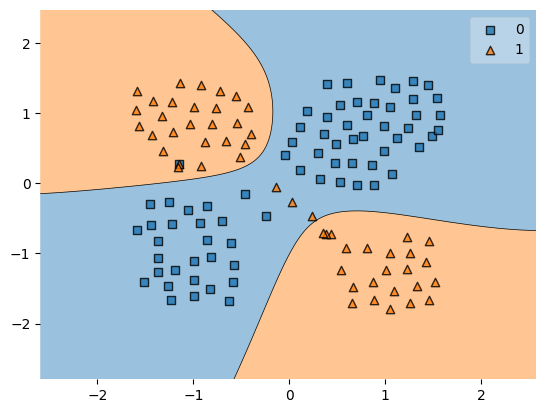

In [48]:
plot_decision_regions(x_trainp,y_train.values,clf=model)

In [49]:
### Building the Logical structure
model=Sequential()
model.add(Dense(20,activation="relu",input_dim=2))
model.add(Dense(18,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                60        
                                                                 
 dense_28 (Dense)            (None, 18)                378       
                                                                 
 dense_29 (Dense)            (None, 10)                190       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 639 (2.50 KB)
Trainable params: 639 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
### Training the Model
model.compile(loss="mse",optimizer=SGD(learning_rate=0.1),metrics=["mse"])
history=model.fit(x_trainp,y_train,batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
12/12 [==============================] - 2s 47ms/step - loss: 0.2440 - mse: 0.2440 - val_loss: 0.2364 - val_mse: 0.2364
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2388 - mse: 0.2388 - val_loss: 0.2298 - val_mse: 0.2298
Epoch 3/20
12/12 [==============================] - 0s 8ms/step - loss: 0.2345 - mse: 0.2345 - val_loss: 0.2237 - val_mse: 0.2237
Epoch 4/20
12/12 [==============================] - 0s 12ms/step - loss: 0.2300 - mse: 0.2300 - val_loss: 0.2190 - val_mse: 0.2190
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2255 - mse: 0.2255 - val_loss: 0.2137 - val_mse: 0.2137
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2212 - mse: 0.2212 - val_loss: 0.2053 - val_mse: 0.2053
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2155 - mse: 0.2155 - val_loss: 0.1982 - val_mse: 0.1982
Epoch 8/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2085 - ms

In [52]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 25s 3ms/step


<Axes: >

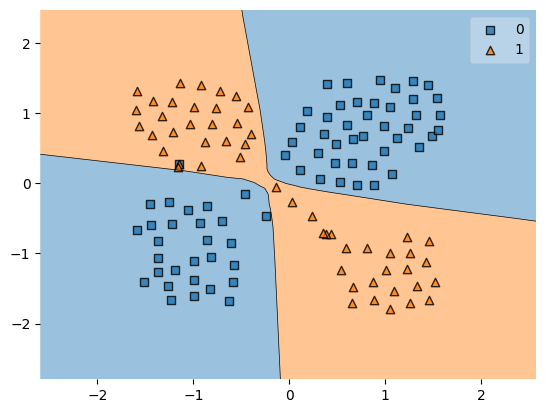

In [53]:
plot_decision_regions(x_trainp,y_train.values,clf=model)

### Observation : Using Relu activation function, we are getting best fit with out regularization.
### Even the hidden layers also very less.